In [1]:

#RICORDATI DI ESEGUIRE QUESTA CELLA!
import jupman;

# Esame Mer 11, Aug 2021 - Modulo B

**Data Science Summer School @Università di Trento**



All'esame sono state consegnate diverse versioni di questo foglio ciascuna con un sottoinsieme di esercizi: uno su liste di liste, uno numpy, uno su reader csv da Alberi monumentali della Campania e due su pandas da Beni culturali Regione Umbria

## [Scarica](_static/generated/sps-2021-08-11-exam.zip) esercizi e soluzioni

## Liste di liste

### matriverba


Scrivi una funzione che data una matrice di caratteri, RITORNA una stringa con le parole estratte dalle colonne, mettendo in maiuscolo il primo carattere di ciascuna parola.

- per il maiuscolo usa `.upper()`

Esempio:

```python
m  = [['p','c','z','g','b', 'd'],
      ['o','a','a','i','o', 'e'],
      ['r','l','n','a','r', 'n'],
      ['t','m','n','r','s', 't'],
      ['o','a','a','a','e', 'e']];

>>> matriverba(m)
'PortoCalmaZannaGiaraBorseDente'
```

In [2]:

def matriverba(mat):
    
        
    ret = []
           
    for j in range(len(mat[0])):
        ret.append(mat[0][j].upper())
        for i in range(1,len(mat)):
            ret.append(mat[i][j])
    return ''.join(ret)
    


# TEST
m1 = [['a']]
assert matriverba(m1) == 'A'

m2 = [['a','b']]
assert matriverba(m2) == 'AB'

m3 = [['c'],
      ['b']]
assert matriverba(m3) == 'Cb'

m4 = [['c','e'],
      ['b','q']]
assert matriverba(m4) == 'CbEq'

m5 = [['p','c','z','g','b', 'd'],
      ['o','a','a','i','o', 'e'],
      ['r','l','n','a','r', 'n'],
      ['t','m','n','r','s', 't'],
      ['o','a','a','a','e', 'e']];

assert matriverba(m5) == 'PortoCalmaZannaGiaraBorseDente'

### cirpillino

Data una `stringa` e un intero `n`, RITORNA una NUOVA matrice come lista di liste contenente tutte le lettere della stringa suddivise in righe da `n` elementi.

- se la lunghezza stringa non è esattamente divisibile per `n`, solleva `ValueError`

In [3]:

def cirpillino(stringa, n):
    
    if len(stringa) % n != 0:
        raise ValueError('La stringa non è divisibile per %s' % n)
    ret = []

    for i in range(len(stringa) // n):        
        ret.append(list(stringa[i*n:(i+1)*n]))
    return ret
    


# TEST
assert cirpillino('z', 1) == [['z']]

assert cirpillino('abc', 1) == [['a'],
                                ['b'],
                                ['c']]

assert cirpillino('abcdef', 2) == [['a','b'],
                                   ['c','d'],
                                   ['e','f']]

assert cirpillino('abcdef', 3) == [['a','b','c'],
                                   ['d','e','f']]

assert cirpillino('cirpillinozimpirelloulalimpo', 4) == [['c', 'i', 'r', 'p'],
                                                         ['i', 'l', 'l', 'i'],
                                                         ['n', 'o', 'z', 'i'],
                                                         ['m', 'p', 'i', 'r'],
                                                         ['e', 'l', 'l', 'o'],
                                                         ['u', 'l', 'a', 'l'],
                                                         ['i', 'm', 'p', 'o']]
try:    
    cirpillino('abc', 5)
    raise Exception("Avrei dovuto fallire !")
except ValueError:
    pass

### bandiera

Dati due numeri interi `n` e `m`, con `m` multiplo di 3, RITORNA una matrice n x m come lista di liste avente nelle celle i numeri da 0 a 2 ripartiti in 3 fasce verticali. Per esempi vedere assert.

- se `m` non è un multiplo di 3, solleva `ValueError`

In [4]:
def bandiera(n,m):
    
    
    if m % 3 != 0:
        raise ValueError('Il numero di colonne non è un multiplo di 3: %s' % m)
        
    ret = []
    
    for i in range(n):
        riga = []        
        for j in range(m):
            num = j // (m // 3)
            riga.append(num)
        ret.append(riga)
    return ret
    
    

# TEST
assert bandiera(1,3) == [[0, 1, 2]]

assert bandiera(1,6) == [[0,0,1,1, 2,2]]

assert bandiera(4,6) == [[0, 0, 1, 1, 2, 2],
                         [0, 0, 1, 1, 2, 2],
                         [0, 0, 1, 1, 2, 2],
                         [0, 0, 1, 1, 2, 2]]

assert bandiera(2,9) == [[0, 0, 0, 1, 1, 1, 2, 2, 2],
                         [0, 0, 0, 1, 1, 1, 2, 2, 2]]

assert bandiera(5,12) == [[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                          [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                          [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                          [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
                          [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]]

try:
    bandiera(3,7)
    raise Exception("Avrei dovuto fallire!")
except ValueError:
    pass    

### no_diag

Data una matrice $n$ x $n$ come lista di liste, RITORNA una NUOVA matrice n x n-1 avente le stesse celle dell'originale ECCETTO le celle della diagonale. Per esempi, vedere gli assert.

- se la matrice non è quadrata, lancia `ValueError`

In [5]:
def no_diag(mat):    
    
    if len(mat) != len(mat[0]):
        raise ValueError("Matrice non quadrata: %s x %s" % (len(mat), len(mat[0])))
    
    ret = []
    i = 0
    for riga in mat:        
        nuova_riga = riga[0:i] + riga[i+1:]
        ret.append(nuova_riga)
        i += 1
    
    return ret
    

# TEST
m1 = [[3,4],
      [8,7]]
assert no_diag(m1) == [[4],
                       [8]]
assert m1 == [[3,4],  # verifica che non abbia cambiato l'originale
              [8,7]] 

m2 = [[9,4,3],
      [8,5,6],
      [0,2,7]]
assert no_diag(m2) == [[4,3],
                       [8,6],
                       [0,2]]
m3 = [[8,5,3,4],
      [7,2,4,1],
      [9,8,3,5],
      [6,0,4,7]]
assert no_diag(m3) == [[5,3,4],
                       [7,4,1],
                       [9,8,5],
                       [6,0,4]]
try:
    no_diag([[2,3,5],
             [1,5,2]])    
    raise Exception("Avrei dovuto fallire!")
except ValueError:    
    pass   

### evita_diag

Data una matrice quadrata $n$ x $n$ come liste di liste RITORNA una NUOVA lista con la somma di tutti i numeri di ogni riga TRANNE la diagonale.

- se la matrice non è quadrata, lancia `ValueError`

In [6]:

def evita_diag(mat):
    
    if len(mat) != len(mat[0]):
        raise ValueError("Matrice non quadrata: %s x %s" % (len(mat), len(mat[0])))
    ret = []
    i = 0
    for riga in mat:
        ret.append(sum(riga) - riga[i])
        i += 1
    return ret
    

assert evita_diag([[5]]) == [0]

m2 = [[5,7],
      [9,1]]
assert evita_diag(m2) == [7,9]
assert m2 ==  [[5,7],
               [9,1]]

assert evita_diag([ [5,6,2],
                   [4,7,9],
                   [1,9,8]]) == [8, 13, 10]

try:
    evita_diag([[2,3,5],
                [1,5,2]])
    raise Exception("Avrei dovuto fallire!")
except ValueError:
    pass   

### no_anti_diag

Data una matrice quadrata $n$ x $n$ mat come lista di liste, RITORNA una NUOVA matrice n x n-1  avente le stesse celle dell'originale ECCETTO le celle della ANTI diagonale. Per esempi, vedere gli assert.

- se `n` non è quadrata, lancia `ValueError`

In [7]:
def no_anti_diag(mat):            
    
    if len(mat) != len(mat[0]):
        raise ValueError("Matrice non quadrata: %s x %s" % (len(mat), len(mat[0])))    
    ret = []
    for i in range(len(mat)):
        k = len(mat) - i - 1
        nuova = mat[i][:k] + mat[i][k+1:]
        ret.append(nuova)
    return ret
    

m1 = [[3,4],
      [8,7]]
assert no_anti_diag(m1) == [[3],
                            [7]]

assert m1 == [[3,4],  # verifica che non abbia cambiato l'originale
              [8,7]] 

m2 = [[9,4,3],
      [8,5,6],
      [0,2,7]]
assert no_anti_diag(m2) == [[9,4],
                            [8,6],
                            [2,7]]
m3 = [[8,5,3,4],
      [7,2,4,1],
      [9,8,3,5],
      [6,0,4,7]]
assert no_anti_diag(m3) == [[8,5,3],
                            [7,2,1],
                            [9,3,5],
                            [0,4,7]]
try:
    no_anti_diag([[2,3,5],
                  [1,5,2]])    
    raise Exception("Avrei dovuto fallire!")
except ValueError:    
    pass  

### matinc

Data una matrice intera RITORNA `True` se tutte le righe sono strettamente crescenti da sinistra a destra, altrimenti ritorna `False`. Per esempi vedere i test.

In [8]:
def matinc(mat):
    
    for i in range(len(mat)):
        for j in range(1, len(mat[0])):
            if mat[i][j] <= mat[i][j-1]:
                return False
    return True             
    
    
# TEST
m1 = [[5]]
assert matinc(m1) == True

m2 = [[7],
      [4]]
assert matinc(m2) == True

m3 = [[2,3],
      [3,5]]
assert matinc(m3) == True

m4 = [[9,4]]
assert matinc(m4) == False

m5 = [[5,5]]
assert matinc(m5) == False

m6 = [[1,4,6,7,9],
      [0,1,2,4,8],
      [2,6,8,9,10]]
assert matinc(m6) == True

m7 = [[0,1,3,4],
      [4,6,9,10],
      [3,7,7,15]]
assert matinc(m7) == False

m8 = [[1,4,8,7,9],
      [0,1,2,4,8]]
assert matinc(m8) == False

### ordinul

Data una matrice come lista di liste di numeri interi, MODIFICA la matrice ordinando SOLO i numeri nell'ultima colonna

- Tutte le altre celle NON devono cambiare

In [9]:
def ordinul(mat):
    
   
    ordinata = sorted([mat[i][-1] for i in range(len(mat))])
    for i in range(len(mat)):
        mat[i][-1] = ordinata[i]
    
    
# TEST    
m1 = [[3]]
ordinul(m1)
assert m1 == [[3]]

m2 = [[9,3,7],
      [8,5,4]]
ordinul(m2)
assert m2 == [[9,3,4],
              [8,5,7]]

m3 = [[8,5,9],
      [7,2,3],
      [9,8,7]]
ordinul(m3)
assert m3 == [[8,5,3],
              [7,2,7],
              [9,8,9]]

m4 = [[8,5,3,2,4],
      [7,2,4,1,1],
      [9,8,3,3,7],
      [6,0,4,2,5]]
ordinul(m4)
assert m4 == [[8, 5, 3, 2, 1],
              [7, 2, 4, 1, 4],
              [9, 8, 3, 3, 5],
              [6, 0, 4, 2, 7]]

assert ordinul([[3]]) == None

## Numpy

### colgap

Data una matrice numpy di $n$ righe ed $m$ colonne, RITORNA un vettore numpy di $m$ elementi  avente la differenza tra i massimi e i minimi di ciascuna colonna.

Esempio: 

```python
m = np.array([[5,4,2],
              [8,5,1],
              [6,7,9],
              [3,6,4],
              [4,3,7]])
>>> colgap(m)
array([5, 4, 8])
```

perchè 

```
5 = 8 - 3
4 = 7 - 3
8 = 9 - 1
```


In [10]:
import numpy as np

def colgap(mat):
    
    #SOLUZIONE EFFICIENTE
    mx = np.max(mat, axis=0)
    mn = np.min(mat, axis=0)
    return mx - mn
    

# TEST
m1 = np.array([[6]])
assert np.allclose(colgap(m1), np.array([0]))
ret = colgap(m1)
assert type(ret) == np.ndarray

m2 = np.array([[6,8]])
assert np.allclose(colgap(m2), np.array([0,0]))
m3 = np.array([[2],
               [5]])    
assert np.allclose(colgap(m3), np.array([3]))
m4 = np.array([[5,7],
               [2,9]])    
assert np.allclose(colgap(m4), np.array([3,2]))
m5 = np.array([[4,7],
               [4,9]])
assert np.allclose(colgap(m5), np.array([0,2]))
m6 = np.array([[5,2],
               [3,7],
               [9,0]])
assert np.allclose(colgap(m6), np.array([6,7]))
m7 = np.array([[5,4,2],
               [8,5,1],
               [6,7,9],
               [3,6,4],
               [4,3,7]])    
assert np.allclose(colgap(m7), np.array([5,4,8]))

### revtriang

Data una matrice quadrata numpy, RITORNA una NUOVA matrice numpy avente le stesse dimensioni dell'originale e i numeri nelle righe della parte triangolare inferiore (diagonale esclusa) in ordine inverso

- se la matrice non è quadrata, lancia`ValueError`

Esempio: 

```python
m  = np.array([[5,4,2,6,4],
               [3,5,1,0,6],
               [6,4,9,2,3],
               [5,2,8,6,1],
               [7,9,3,2,2]])
               
>>> revtriang(m5)
np.array([[5, 4, 2, 6, 4],
          [3, 5, 1, 0, 6],    # 3       -> 3
          [4, 6, 9, 2, 3],    # 6,4     -> 4,6
          [8, 2, 5, 6, 1],    # 5,2,8   -> 8,2,5
          [2, 3, 9, 7, 2]])   # 7,9,3,2 -> 2,3,9,7
```          

In [11]:
import numpy as np

def revtriang(mat):
    
   
    n,m = mat.shape
    if n != m:
        raise ValueError("Attesa matrice quadrata, trovato invece n=%s, m=%s" % (n,m))
        
    ret = mat.copy()
    
    for i in range(1,n):
        ret[i,:i] = np.flip(mat[i,:i])
    return ret
    

m1 = np.array([[8]])
assert np.allclose(revtriang(m1), np.array([[8]]))


m3 = np.array([[1,5],
               [9,6]])
assert np.allclose(revtriang(m3), np.array([[1,5],
                                            [9,6]]))

m4 = np.array([[1,5,8],
               [9,6,2],
               [3,2,5]])
assert np.allclose(revtriang(m4), np.array([[1,5,8],
                                            [9,6,2],
                                            [2,3,5]]))
assert np.allclose(m4, np.array([[1,5,8],
                                 [9,6,2],
                                 [3,2,5]]))  # non cambia l'originale

m5 = np.array([[5,4,2,6,4],
               [3,5,1,0,6],
               [6,4,9,2,3],
               [5,2,8,6,1],
               [7,9,3,2,2]])
assert np.allclose(revtriang(m5), np.array([[5, 4, 2, 6, 4],
                                            [3, 5, 1, 0, 6],
                                            [4, 6, 9, 2, 3],
                                            [8, 2, 5, 6, 1],
                                            [2, 3, 9, 7, 2]]))
try:
    revtriang(np.array([[7,1,6],
                        [5,2,4]]))
    raise Exception("Avrei dovuto fallire!")
except ValueError:
    pass

###  compricol

Data una matrice `mat` $n$ x $2m$ con numero di colonne pari, RITORNA una NUOVA matrice $n$ x $m$ in cui le colonne sono date dalle somma delle coppie di colonne corrispondenti di `mat`

- se `mat` non ha numero di colonne pari, lancia `ValueError`

Esempio:

```python
m  = np.array([[5,4,2,6,4,2],
               [7,5,1,0,6,1],
               [6,7,9,2,3,7],
               [5,2,4,6,1,3],
               [7,2,3,4,2,5]])

>>> compricol(m)
np.array([[ 9, 8, 6],
          [12, 1, 7],
          [13,11,10],
          [ 7,10, 4],
          [ 9, 7, 7]])
```

perchè 

```
9 = 5 + 4     8 = 2 + 6     6 = 4 + 2
12= 7 + 5     1 = 1 + 0     7 = 6 + 1
. . .

```



In [12]:
import numpy as np

def compricol(mat):
    
 
    #SOLUZIONE EFFICIENTE
    if mat.shape[1] % 2 != 0:
        raise ValueError("Attesa matrice con numero di colonne pari, trovate invece: %s" % mat.shape[1])
    n,m = mat.shape[0], mat.shape[1] // 2
    ret = mat[:,::2].copy()
    ret += mat[:,1::2]
    return ret
    

m1 = [[7,9]]
res = compricol(np.array(m1))
assert type(res) == np.ndarray
assert np.allclose(res, np.array([[16]]))

m2  = np.array([[5,8],
               [7,2]])
assert np.allclose(compricol(m2), np.array([[13],
                                            [9]]))
assert np.allclose(m2, np.array([[5,8],
                                 [7,2]]))  # non cambia la matrice originale

m3  = np.array([[5,4,2,6,4,2],
                [7,5,1,0,6,1],
                [6,7,9,2,3,7],
                [5,2,4,6,1,3],
                [7,2,3,4,2,5]])
 
assert np.allclose(compricol(m3), np.array([[ 9, 8, 6],
                                            [12, 1, 7],
                                            [13,11,10],
                                            [ 7,10, 4],
                                            [ 9, 7, 7]]))

try:
    compricol(np.array([[7,1,6],
                        [5,2,4]]))
    raise Exception("Avrei dovuto fallire!")
except ValueError:
    pass

### sostmax

Data una matrice numpy `mat` $n$ x $m$, MODIFICA la matrice sostituendo ogni cella con il valore massimo trovato nella colonna corrispondente.

Esempio:

```python
m  = np.array([[5,4,2],
               [8,5,1],
               [6,7,9],
               [3,6,4],
               [4,3,7]])
>>> sostmax(m)    # non ritorna niente!
>>> m
np.array([[8, 7, 9],
          [8, 7, 9],
          [8, 7, 9],
          [8, 7, 9],
          [8, 7, 9]])
```          

In [13]:
import numpy as np

def sostmax(mat):
    
    #SOLUZIONE EFFICIENTE
    mat[:,:] = np.max(mat, axis=0)
    

# TEST
m1 = np.array([[6]])
sostmax(m1)
assert np.allclose(m1, np.array([6]))
ret = sostmax(m1)  
assert ret == None # non ritorna nulla!

m2 = np.array([[6,8]])
sostmax(m2)
assert np.allclose(m2, np.array([6,8]))

m3 = np.array([[2],
               [5]])
sostmax(m3)
assert np.allclose(m3, np.array([[5],
                                 [5]]))

m4 = np.array([[5,7],
               [2,9]]) 
sostmax(m4)

assert np.allclose(m4, np.array([[5,9],
                                 [5,9]]))

m5 = np.array([[4,7],
               [4,9]])
sostmax(m5)
assert np.allclose(m5, np.array([[4,9],
                                 [4,9]]))

m6 = np.array([[5,2],
               [3,7],
               [9,0]])
sostmax(m6)
assert np.allclose(m6, np.array([[9,7],
                                 [9,7],
                                 [9,7]]))

m7 = np.array([[5,4,2],
               [8,5,1],
               [6,7,9],
               [3,6,4],
               [4,3,7]])
sostmax(m7)
assert np.allclose(m7, np.array([[8, 7, 9],
                                 [8, 7, 9],
                                 [8, 7, 9],
                                 [8, 7, 9],
                                 [8, 7, 9]]))

### camminas

Data una matrice numpy $n$ x $m$ con $m$ dispari, RITORNA un array numpy contenente tutti i numeri trovati lungo il percorso di una S, dal basso verso l'alto.

**SUGGERIMENTO**: puoi determinare a priori la dimensione dell'array risultante?

Esempio:
    
```python    
m = np.array([[5,8,2,4,6,5,7],
              [7,9,5,8,3,2,2],
              [6,1,8,3,6,6,1],
              [1,5,3,7,9,4,7],
              [1,5,3,2,9,5,4],
              [4,3,8,5,6,1,5]])
```

deve percorrere, **dal basso verso l'alto**: 

```python
m = np.array([[5,8,2,>,>,>,>],
              [7,9,5,^,3,2,2],
              [6,1,8,^,6,6,1],
              [1,5,3,^,9,4,7],
              [1,5,3,^,9,5,4],
              [>,>,>,^,6,1,5]])
```

Per ottenere:

```python
>>> camminas(m)
array([4., 3., 8., 5., 2., 7., 3., 8., 4., 6., 5., 7.])
```

In [14]:
import numpy as np

def camminas(mat):    
    
    #SOLUZIONE EFFICIENTE
    n,m = mat.shape    
    ret = np.zeros(n + m-1)
    ret[:m//2] = mat[-1,:m//2]
    ret[m//2:m//2+n] = mat[::-1,m//2]
    ret[-m//2:] = mat[0,m//2:]
    return ret
    

# TEST
m1 = np.array([[7]])    
assert np.allclose(camminas(m1), np.array([7]))

m2 = np.array([[7,5,2]])
assert np.allclose(camminas(m2), np.array([7,5,2]))

m3 = np.array([[9,3,5,6,0]])
assert np.allclose(camminas(m3), np.array([9,3,5,6,0]))

m4 = np.array([[7,5,2],
               [9,3,4]])
assert np.allclose(camminas(m4), np.array([9,3,5,2]))
                   
m5 = np.array([[7,4,6],
               [8,2,1],
               [0,5,3]])
assert np.allclose(camminas(m5), np.array([0,5,2,4,6]))
    
m6 = np.array([[5,8,2,4,6,5,7],
               [7,9,5,8,3,2,2],
               [6,1,8,3,6,6,1],
               [1,5,3,7,9,4,7],
               [1,5,3,2,9,5,4],
               [4,3,8,5,6,1,5]])    
assert np.allclose(camminas(m6), np.array([4,3,8,5,2,7,3,8,4,6,5,7]))

### camminaz

Data una matrice numpy $n$ x $m$ con $m$ dispari, RITORNA un array numpy contenente tutti i numeri trovati lungo il percorso di una Z, dal basso verso l'alto.

**SUGGERIMENTO**: puoi determinare a priori la dimensione dell'array risultante?

Esempio:
    
```python    
m = np.array([[5,8,2,4,6,5,7],
              [7,9,5,8,3,2,2],
              [6,1,8,3,6,6,1],
              [1,5,3,7,9,4,7],
              [1,5,3,2,9,5,4],
              [4,3,8,5,6,1,5]])
```

deve percorrere, **dal basso verso l'alto**: 

```python
m = np.array([[<,<,<,^,6,5,7],
              [7,9,5,^,3,2,2],
              [6,1,8,^,6,6,1],
              [1,5,3,^,9,4,7],
              [1,5,3,^,9,5,4],
              [4,3,8,^,<,<,<]])
```

Per ottenere:

```python
>>> camminaz(m)
array([5.,1.,6.,5.,2.,7.,3.,8.,4.,2.,8.,5.])
```

In [15]:
import numpy as np

def camminaz(mat):    
    
    #SOLUZIONE EFFICIENTE
    n,m = mat.shape    
    ret = np.zeros(n + m-1)
    ret[:m//2] = mat[-1,-1:m//2:-1]
    ret[m//2:m//2+n] = mat[::-1,m//2]
    ret[-m//2:] = mat[0,m//2::-1]
    return ret
    

# TEST
m1 = np.array([[7]])    
assert np.allclose(camminaz(m1), np.array([7]))

m2 = np.array([[7,5,2]])
assert np.allclose(camminaz(m2), np.array([2,5,7]))

m3 = np.array([[9,3,5,6,0]])
assert np.allclose(camminaz(m3), np.array([0,6,5,3,9]))

m4 = np.array([[7,5,2],
               [9,3,4]])
assert np.allclose(camminaz(m4), np.array([4,3,5,7]))
                   
m5 = np.array([[7,4,6],
               [8,2,1],
               [0,5,3]])
assert np.allclose(camminaz(m5), np.array([3,5,2,4,7]))
    
m6 = np.array([[5,8,2,4,6,5,7],
               [7,9,5,8,3,2,2],
               [6,1,8,3,6,6,1],
               [1,5,3,7,9,4,7],
               [1,5,3,2,9,5,4],
               [4,3,8,5,6,1,5]])    
assert np.allclose(camminaz(m6), np.array([5,1,6,5,2,7,3,8,4,2,8,5]))

## Alberi monumentali della Campania

### albernomi

Scrivi una funzione che data una `parola` di ricerca carica il file [Alberi-Monumentali-Della-Campania.csv](Alberi-Monumentali-Della-Campania.csv) con un csv reader (**usa il parametro** `delimiter=';'` ed encoding utf-8), STAMPA il numero di risultati ottenuti e RITORNA tutti gli alberi aventi quella parola nel nome scientifico oppure nel nome volgare. 

- la ricerca deve funzionare independentemente dalla capitalizzazione di `parola` o del dataset


Il formato di output deve essere una lista di dizionari come questa:

```python
>>> albernomi('tiglio')
Trovati 12 risultati     
  
[{'nome': 'Tiglio intermedio',
  'nome_scientifico': 'Tilia vulgaris',
  'luogo': 'Collegiata della Santissima Annunziata'},
 {'nome': 'Tiglio intermedio',
  'nome_scientifico': 'Tilia vulgaris',
  'luogo': 'Petruro di Forino'},
 {'nome': 'Tiglio selvatico',
  'nome_scientifico': 'Tilia cordata',
  'luogo': 'San Barbato - Castello'},
  .
  .
  .
]
```

Sorgente dati: [dati.gov.it](https://dati.gov.it/view-dataset/dataset?id=9e636fa8-8a8d-43ed-820a-09cd31c9f2b5)

In [16]:
import csv

def albernomi(parola):
    
    with open('Alberi-Monumentali-Della-Campania.csv', encoding='utf-8', newline='') as f:
        lettore = csv.DictReader(f, delimiter=';')
        next(lettore)
        ret = []
        for d in lettore:

            if parola.lower() in d['NOME_SCIENTIFICO'].lower() \
               or parola.lower() in d['NOME_VOLGARE'].lower():
                diz = {'nome' : d['NOME_VOLGARE'],
                       'nome_scientifico' : d['NOME_SCIENTIFICO'],
                       'luogo' : d['LOCALITA']}
                ret.append(diz)
        
        print('Trovati', len(ret), 'risultati')
    return ret
    
    
albernomi('tiglio')    # 12 risultati
#albernomi('TIGLIO')   # 12 risultati
#albernomi('tilia')    # 12 risultati
#albernomi('Tilia')    # 12 risultati
#albernomi('cordata')  # 8 risultati

Trovati 12 risultati


[{'nome': 'Tiglio intermedio',
  'nome_scientifico': 'Tilia vulgaris',
  'luogo': 'Collegiata della Santissima Annunziata'},
 {'nome': 'Tiglio intermedio',
  'nome_scientifico': 'Tilia vulgaris',
  'luogo': 'Petruro di Forino'},
 {'nome': 'Tiglio selvatico',
  'nome_scientifico': 'Tilia cordata',
  'luogo': 'San Barbato - Castello'},
 {'nome': 'Tiglio selvatico',
  'nome_scientifico': 'Tilia cordata',
  'luogo': 'Piazza San Felice'},
 {'nome': 'Tiglio selvatico',
  'nome_scientifico': 'Tilia cordata',
  'luogo': 'Casola'},
 {'nome': 'Tiglio nostrale',
  'nome_scientifico': 'Tilia platyphyllos',
  'luogo': 'Piano di Sorrento'},
 {'nome': 'Tiglio',
  'nome_scientifico': 'Tilia vulgaris',
  'luogo': 'Centro Urbano'},
 {'nome': 'Tiglio',
  'nome_scientifico': 'Tilia cordata',
  'luogo': 'Massaquano'},
 {'nome': 'Tiglio', 'nome_scientifico': 'Tilia cordata', 'luogo': 'Filetta'},
 {'nome': 'Tiglio', 'nome_scientifico': 'Tilia cordata', 'luogo': 'Campora'},
 {'nome': 'Tiglio',
  'nome_scienti

### alberalti

Scrivi una funzione che date una altezza minima e una massima carica il file [Alberi-Monumentali-Della-Campania.csv](Alberi-Monumentali-Della-Campania.csv) con un csv reader (**usa il parametro** `delimiter=';'` ed encoding utf-8), STAMPA il numero di risultati ottenuti e RITORNA tutti gli alberi aventi altezza inclusa nell'intervallo dato **estremi inclusi**.

Il formato di output deve essere una lista di dizionari come questa:

```python
>>> alberalti(4,7)
  
Trovati 13 risultati

[{'nome': 'Tiglio selvatico', 
  'altezza': 6, 
  'località': 'San Barbato - Castello'},
 {'nome': 'Sofora',
  'altezza': 5, 
  'località': 'Villa Rende'},
 {'nome': 'Olivo',            
  'altezza': 6, 
  'località': 'Via Carducci - Piazza Sabbato'},
   .
   .
   .
]
```

Sorgente dati: [dati.gov.it](https://dati.gov.it/view-dataset/dataset?id=9e636fa8-8a8d-43ed-820a-09cd31c9f2b5)

In [17]:
import csv

def alberalti(minh, maxh):
    
    with open('Alberi-Monumentali-Della-Campania.csv', encoding='utf-8', newline='') as f:
        lettore = csv.DictReader(f, delimiter=';')
        next(lettore)
        ret = []
        for d in lettore:                        
            h = int(d['ALTEZZA'])
            if minh <= h and h <= maxh:
                diz = { 'nome' : d['NOME_VOLGARE'],                        
                        'altezza' : h,
                        'località' : d['LOCALITA']}
                ret.append(diz)
                
        print('Trovati', len(ret), 'risultati')
    return ret
    
    
alberalti(4,7)    # 13 risultati
#alberalti(5,8)   # 15 risultati

Trovati 13 risultati


[{'nome': 'Tiglio selvatico',
  'altezza': 6,
  'località': 'San Barbato - Castello'},
 {'nome': 'Sofora', 'altezza': 5, 'località': 'Villa Rende'},
 {'nome': 'Olivo', 'altezza': 6, 'località': 'Via Carducci - Piazza Sabbato'},
 {'nome': 'Leccio', 'altezza': 7, 'località': 'Viale della Vittoria'},
 {'nome': 'Platano', 'altezza': 4, 'località': 'Ogliara'},
 {'nome': 'Tiglio', 'altezza': 6, 'località': 'Centro Urbano'},
 {'nome': 'Leccio', 'altezza': 6, 'località': 'Piazza F. Napolitano'},
 {'nome': 'Gelso', 'altezza': 6, 'località': 'Puolo - Villa Angelina'},
 {'nome': 'Tiglio', 'altezza': 6, 'località': 'Massaquano'},
 {'nome': 'Alloro', 'altezza': 6, 'località': 'Pratillo'},
 {'nome': 'Gelso', 'altezza': 4, 'località': 'Vieticala'},
 {'nome': 'Tiglio', 'altezza': 5, 'località': 'Filetta'},
 {'nome': 'Yucca', 'altezza': 6, 'località': "Mostra d'Oltremare"}]

### alberi per provincia

Scrivere del codice che conta per ogni provincia quanti alberi ci sono, e visualizza un grafico a barre verdi

SUGGERIMENTO: Vedere [grafici a barre](https://it.softpython.org/visualization/visualization1-sol.html#Grafici-a-barre) e [xticks](https://it.softpython.org/visualization/visualization1-sol.html#Le-etichette-sugli-assi)

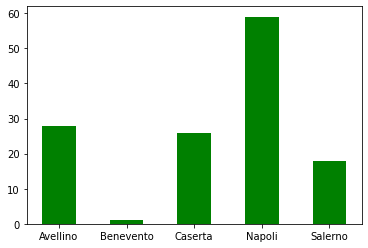

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


# scrivi qui
with open('Alberi-Monumentali-Della-Campania.csv', encoding='utf-8', newline='') as f:
    lettore = csv.DictReader(f, delimiter=';')
    next(lettore)
    ret = []
    province = {}
    for d in lettore:
        h = int(d['ALTEZZA'])
        p = d['PROVINCIA']
        if p not in province:
            province[p] = 1
        else:
            province[p] += 1


    xs = list(range(len(province)))
    nomi_province = province.keys()
    ys = [province[x] for x in nomi_province]
    plt.xticks(xs, nomi_province)

    plt.bar(xs, ys,
            0.5,            
            color='green',                              
            align='center') 

    plt.show()                 

## Beni culturali Regione Umbria

Apri il dataset [beni-culturali-umbria.csv](beni-culturali-umbria.csv) con pandas (encoding UTF-8) e mostra informazioni sulle colonne

* **ATTENZIONE: usa l'attributo** `delimiter=';'` 

Sorgente dati: [dati.gov.it](https://dati.gov.it/view-dataset/dataset?id=36edd544-412a-4377-b00e-f01782af90cd)

In [19]:
import pandas as pd   
import numpy as np    

# scrivi qui
df = pd.read_csv('beni-culturali-umbria.csv', encoding='UTF-8', delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUMERO               105 non-null    int64 
 1   BENEFICIARIO         105 non-null    object
 2   PROGETTO             105 non-null    object
 3   PROGRAMMA_OPERATIVO  105 non-null    object
 4   STATO_ATTUAZIONE     105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [29]:
df

NUMERO                        BENEFICIARIO  \
0         1               Comune di Acquasparta   
1         2               Comune di Acquasparta   
2         3               Comune di Acquasparta   
3         4               Comune di Acquasparta   
4         5               Comune di Acquasparta   
..      ...                                 ...   
100     101                 Comune di Umbertide   
101     102                      Regione Umbria   
102     103  Azienda pubblica 'Veralli Cortesi'   
103     104        Sodalizio S. Martino Perugia   
104     105                 Valnestore Sviluppo   

                                              PROGETTO  \
0    Progetto per il recupero, il restauro e la tra...   
1    Recupero, restauro e trasformazione in centro ...   
2       Riqualificazione e valorizzazione Palazzo Cesi   
3    Completamento Palazzo Cesi. Riqualificazione d...   
4    Completamento delle opere di restauro e valori...   
..                                                 ...   
100  Lavori di completamento del Centro Socio Cultu...   
101  Recupero e consolidamento della Cinta muraria ...   
102  Valorizzazione arte contemporanea. Lavori di c...   
103             FUSEUM Museo Brajo Fuso: completamento   
104    Museo Paleontologico L. Boldrini. Completamento   

                    PROGRAMMA_OPERATIVO           STATO_ATTUAZIONE sigla  
0    POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   POR  
1     PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
2     PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
3     PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
4     POR FESR 2014 - 2020 Azione 5.2.1  IN CORSO DI REALIZZAZIONE   POR  
..                                  ...                        ...   ...  
100  POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   POR  
101   PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
102   PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
103   PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  
104   PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   PAR  

[105 rows x 6 columns]

### stato progetti 

Data il dizionario `query` con `comune` e `stato`, trova tutti i progetti ce soddisfino **entrambe** le condizioni

* **NON** scrivere `Acquasparta` o `REALIZZATO` nel codice ! 

In [21]:
query = {'comune' : 'Acquasparta',
         'stato'  : 'REALIZZATO'
        }
#query = {'comune' : 'Spoleto', 'stato' : 'IN CORSO DI REALIZZAZIONE' }

# scrivi qui
df[(df['STATO_ATTUAZIONE'] == query['stato']) & df['BENEFICIARIO'].str.contains(query['comune'])]

NUMERO           BENEFICIARIO  \
0       1  Comune di Acquasparta   
1       2  Comune di Acquasparta   
2       3  Comune di Acquasparta   
3       4  Comune di Acquasparta   

                                            PROGETTO  \
0  Progetto per il recupero, il restauro e la tra...   
1  Recupero, restauro e trasformazione in centro ...   
2     Riqualificazione e valorizzazione Palazzo Cesi   
3  Completamento Palazzo Cesi. Riqualificazione d...   

                  PROGRAMMA_OPERATIVO STATO_ATTUAZIONE  
0  POR FESR 2007 -2013 Attività 2.2.2       REALIZZATO  
1   PAR FSC 2007 - 2013 Azione 3.5.2a       REALIZZATO  
2   PAR FSC 2007 - 2013 Azione 3.5.2a       REALIZZATO  
3   PAR FSC 2007 - 2013 Azione 3.5.2a       REALIZZATO

### riqualificazione

Trova tutti i progetti che prevedono riqualificazione

**ATTENZIONE** alle diverse capitalizzazioni! In tutto dovresti trovare 17 risultati

In [22]:
# scrivi qui
df[df['PROGETTO'].str.contains('riqualificazione') | df['PROGETTO'].str.contains('Riqualificazione')]

NUMERO                      BENEFICIARIO  \
2        3             Comune di Acquasparta   
3        4             Comune di Acquasparta   
8        9                  Comune di Assisi   
9       10                  Comune di Assisi   
10      11            Comune di Bastia Umbra   
15      16                  Comune di Cascia   
32      33                 Comune di Foligno   
34      35       Comune di Giano dell’Umbria   
39      40                  Comune di Gubbio   
46      47  Comune di Montecastello di Vibio   
63      64                 Comune di Parrano   
67      68                 Comune di Perugia   
68      69                 Comune di Perugia   
85      86                 Comune di Spoleto   
89      90                   Comune di Terni   
91      92                    Comune di Todi   
97      98                   Comune di Trevi   

                                             PROGETTO  \
2      Riqualificazione e valorizzazione Palazzo Cesi   
3   Completamento Palazzo Cesi. Riqualificazione d...   
8       Riqualificazione e adegaumento IAT Area Vasta   
9   Valorizzazione degli spazi espositivi di Palaz...   
10     Riqualificazione sito archeologico Via Renzini   
15      Riqualificazione e adeguamento IAT Area Vasta   
32      Riqualificazione e adegaumento IAT Area Vasta   
34  Sistema bibliotecario – documentario. Ristrutt...   
39  Valorizzazione e riqualificazione del compless...   
46  Lavori di riqualificazione ed adeguamento impi...   
63  Valorizzazione Tane del Diavolo - Riqualificaz...   
67  Circuito culturale: Riqualificazione dell'impi...   
68  Circuito culturale: Riqualificazione e nuove f...   
85  Interventi per il potenziamento e la riqualifi...   
89  Archeologia Borghi Cultura e Paesaggi. Area ar...   
91      Riqualificazione e adegaumento IAT Area Vasta   
97  Villa Fabri: Restauro degli apparati decorativ...   

                                  PROGRAMMA_OPERATIVO  \
2                   PAR FSC 2007 - 2013 Azione 3.5.2a   
3                   PAR FSC 2007 - 2013 Azione 3.5.2a   
8              APQ Beni culturali II Atto integrativo   
9                   POR FESR 2014 - 2020 Azione 5.2.1   
10                 POR FESR 2007 -2013 Attività 2.2.2   
15             APQ Beni culturali II Atto integrativo   
32             APQ Beni culturali II Atto integrativo   
34                  PAR FSC 2007 - 2013 Azione 3.5.2a   
39                 POR FESR 2007 -2013 Attività 2.2.2   
46                  PAR FSC 2007 - 2013 Azione 3.5.2a   
63                 POR FESR 2007 -2013 Attività 2.2.2   
67                  PAR FSC 2007 - 2013 Azione 3.5.2a   
68                  PAR FSC 2007 - 2013 Azione 3.5.2a   
85             APQ Beni culturali II Atto integrativo   
89                  PAR FSC 2007 - 2013 Azione 3.5.2a   
91             APQ Beni culturali II Atto integrativo   
97  PAR FSC 2007 - 2013 Azione 3.5.2a e APQ Beni c...   

             STATO_ATTUAZIONE  
2                  REALIZZATO  
3                  REALIZZATO  
8                  REALIZZATO  
9   IN CORSO DI REALIZZAZIONE  
10                 REALIZZATO  
15                 REALIZZATO  
32                 REALIZZATO  
34                 REALIZZATO  
39                 REALIZZATO  
46  IN CORSO DI REALIZZAZIONE  
63                 REALIZZATO  
67                 REALIZZATO  
68                 REALIZZATO  
85                 REALIZZATO  
89                 REALIZZATO  
91                 REALIZZATO  
97                 REALIZZATO

### estremi

Trovare tutti i progetti aventi NUMERO incluso tra i limiti indicati nella variabile `estremi` (inclusi)

* **NON** scrivere `10` o `18` nel codice!

In [23]:
estremi = (10,18)
#estremi = (15,21)

# scrivi qui

df[(df['NUMERO'] >= estremi[0]) & (df['NUMERO'] <= estremi[1])]

NUMERO                     BENEFICIARIO  \
9       10                 Comune di Assisi   
10      11           Comune di Bastia Umbra   
11      12                Comune di Bettona   
12      13                Comune di Bettona   
13      14                Comune di Bevagna   
14      15  Comune di Campello sul Clitunno   
15      16                 Comune di Cascia   
16      17                 Comune di Cascia   
17      18                 Comune di Cascia   

                                             PROGETTO  \
9   Valorizzazione degli spazi espositivi di Palaz...   
10     Riqualificazione sito archeologico Via Renzini   
11  Sistema museale di Bettona - Compeltamento del...   
12  Lavori di movimentazione e restauro del porton...   
13  Completamento Palazzo della Cultura - Allestim...   
14  Valorizzazione del centro storico del Castello...   
15      Riqualificazione e adeguamento IAT Area Vasta   
16  Realizzazione dei servizi innovativi per la va...   
17       Polo museale Santa Margherita. Completamento   

                           PROGRAMMA_OPERATIVO           STATO_ATTUAZIONE  
9            POR FESR 2014 - 2020 Azione 5.2.1  IN CORSO DI REALIZZAZIONE  
10          POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO  
11           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO  
12           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO  
13          POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO  
14           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO  
15      APQ Beni culturali II Atto integrativo                 REALIZZATO  
16  Programma Parallelo al POR FESR 2007 -2013                 REALIZZATO  
17           PAR FSC 2007 - 2013 Azione 3.5.2a  IN CORSO DI REALIZZAZIONE

### Stato attuazione PAR 

Selezionare solo i progetti operativi PAR (che quindi hanno PAR in PROGETTO_OPERATIVO) e mostrarne il conteggio dello stato d'attuazione

In [24]:
# scrivi qui
adf = df[df['PROGRAMMA_OPERATIVO'].str.contains('PAR')]
adf.groupby(['STATO_ATTUAZIONE'])['STATO_ATTUAZIONE'].count()

STATO_ATTUAZIONE
IN CORSO DI REALIZZAZIONE    12
REALIZZATO                   36
Name: STATO_ATTUAZIONE, dtype: int64

### progetti a Todi

Mostrare il conteggio dei progetti realizzati a Todi

In [25]:
# scrivi qui
tdf = df[df['BENEFICIARIO'] == 'Comune di Todi']
tdf.groupby(['BENEFICIARIO','STATO_ATTUAZIONE'])['STATO_ATTUAZIONE'].count()

BENEFICIARIO    STATO_ATTUAZIONE         
Comune di Todi  IN CORSO DI REALIZZAZIONE    4
                REALIZZATO                   2
Name: STATO_ATTUAZIONE, dtype: int64

### Comuni beneficiari

Trovare i comuni beneficiari togliendo il prefisso 'Comune di', e senza duplicati

- **NON** usare cicli `for` o list comprehension
- **SUGGERIMENTO**: usare [pd.unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [26]:
# scrivi qui
cdf = df[df['BENEFICIARIO'].str.contains('Comune')]

pd.unique(cdf['BENEFICIARIO'].str[10:].str.strip())

array(['Acquasparta', 'Amelia', 'Assisi', 'Bastia Umbra', 'Bettona',
       'Bevagna', 'Campello sul Clitunno', 'Cascia', 'Castel Viscardo',
       'Città della Pieve', 'Città di Castello', 'Corciano', 'Deruta',
       'Ferentillo', 'Foligno', 'Fratta Todina', 'Giano dell’Umbria',
       'Gualdo Tadino', 'Guardea', 'Gubbio', 'Marsciano',
       'Montecastello di Vibio', 'Montecchio', 'Montefalco', 'Narni',
       'Nocera Umbra', 'Orvieto', 'Otricoli', 'Panicale', 'Parrano',
       'Perugia', 'Piegaro', 'Polino', 'Preci', "Sant'Anatolia di Narco",
       'Sellano', 'Spello', 'Spoleto', 'Terni', 'Todi', 'Torgiano',
       'Trevi', 'Tuoro sul Trasimeno', 'Umbertide'], dtype=object)

### programma operativo

Creare una nuova colonna `sigla` con i primi 3 caratteri della colonna `PROGRAMMA_OPERATIVO`. 

- se la prima parola è maggiore di 3 caratteri, impostare stringa vuota
- **SUGGERIMENTO**: servirà una `transform` con funzione

In [27]:
# scrivi qui
def trasf(stringa):
    candidato = stringa.split()[0]
    if len(candidato) == 3:
        return candidato
    else:
        return ''
    
df['sigla'] = df['PROGRAMMA_OPERATIVO'].transform(trasf)

In [28]:
df[:18]  # nota la riga 16

NUMERO                     BENEFICIARIO  \
0        1            Comune di Acquasparta   
1        2            Comune di Acquasparta   
2        3            Comune di Acquasparta   
3        4            Comune di Acquasparta   
4        5            Comune di Acquasparta   
5        6                 Comune di Amelia   
6        7                Comune di  Assisi   
7        8                 Comune di Assisi   
8        9                 Comune di Assisi   
9       10                 Comune di Assisi   
10      11           Comune di Bastia Umbra   
11      12                Comune di Bettona   
12      13                Comune di Bettona   
13      14                Comune di Bevagna   
14      15  Comune di Campello sul Clitunno   
15      16                 Comune di Cascia   
16      17                 Comune di Cascia   
17      18                 Comune di Cascia   

                                             PROGETTO  \
0   Progetto per il recupero, il restauro e la tra...   
1   Recupero, restauro e trasformazione in centro ...   
2      Riqualificazione e valorizzazione Palazzo Cesi   
3   Completamento Palazzo Cesi. Riqualificazione d...   
4   Completamento delle opere di restauro e valori...   
5   Sistema bibliotecario – documentario. Risaname...   
6   Allestimento di Palazzo Monte Frumentario fina...   
7   Valorizzazione degli spazi espositivi di Palaz...   
8       Riqualificazione e adegaumento IAT Area Vasta   
9   Valorizzazione degli spazi espositivi di Palaz...   
10     Riqualificazione sito archeologico Via Renzini   
11  Sistema museale di Bettona - Compeltamento del...   
12  Lavori di movimentazione e restauro del porton...   
13  Completamento Palazzo della Cultura - Allestim...   
14  Valorizzazione del centro storico del Castello...   
15      Riqualificazione e adeguamento IAT Area Vasta   
16  Realizzazione dei servizi innovativi per la va...   
17       Polo museale Santa Margherita. Completamento   

                           PROGRAMMA_OPERATIVO           STATO_ATTUAZIONE  \
0           POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   
1            PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
2            PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
3            PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
4            POR FESR 2014 - 2020 Azione 5.2.1  IN CORSO DI REALIZZAZIONE   
5            PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
6           POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   
7            PAR FSC 2007 - 2013 Azione 3.5.2a  IN CORSO DI REALIZZAZIONE   
8       APQ Beni culturali II Atto integrativo                 REALIZZATO   
9            POR FESR 2014 - 2020 Azione 5.2.1  IN CORSO DI REALIZZAZIONE   
10          POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   
11           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
12           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
13          POR FESR 2007 -2013 Attività 2.2.2                 REALIZZATO   
14           PAR FSC 2007 - 2013 Azione 3.5.2a                 REALIZZATO   
15      APQ Beni culturali II Atto integrativo                 REALIZZATO   
16  Programma Parallelo al POR FESR 2007 -2013                 REALIZZATO   
17           PAR FSC 2007 - 2013 Azione 3.5.2a  IN CORSO DI REALIZZAZIONE   

   sigla  
0    POR  
1    PAR  
2    PAR  
3    PAR  
4    POR  
5    PAR  
6    POR  
7    PAR  
8    APQ  
9    POR  
10   POR  
11   PAR  
12   PAR  
13   POR  
14   PAR  
15   APQ  
16        
17   PAR